In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [4]:
database = pd.read_csv('database.csv')
database.head(100)

,samples,type,NM_144987,NM_013290,ENST00000322831,NM_001625,lincRNA:chr7:226042-232442_R,NM_032391,ENST00000238571,XR_108906,...,lincRNA:chr4:77860976-77869926_F,NM_152343,NM_001005327,NM_001039355,lincRNA:chr21:44456656-44468556_R,lincRNA:chr9:4869500-4896050_F,NM_016053,NM_001080425,ENST00000555638,ENST00000508993
0,GSM1823702_252800417016_S01_GE1_107_Sep09_1_2,normal,8.693318,7.718016,6.044438,10.747077,9.133777,4.735581,5.634732,4.670231,...,7.570363,6.368684,4.784042,10.747723,5.090500,5.994149,10.649336,8.969439,4.985693,5.090500
1,GSM1823703_252800417016_S01_GE1_107_Sep09_2_1,normal,9.375980,7.072232,6.976741,10.429671,9.526500,5.221089,5.425187,4.860931,...,7.903335,5.713115,4.421074,11.299200,4.447052,4.421074,10.746854,8.174489,4.464177,4.536891
2,GSM1823704_252800416877_S01_GE1_107_Sep09_2_3,normal,8.943442,7.964573,6.269055,10.825025,9.396855,5.258506,5.824921,4.964604,...,7.705765,6.595364,4.410870,10.576807,5.003699,6.529257,10.430034,8.473468,4.668447,5.084127
3,GSM1823705_252800416894_S01_GE1_107_Sep09_1_1,normal,9.020798,7.824639,6.165165,11.646788,8.776462,4.648655,6.676692,4.770186,...,6.633058,5.786781,4.572984,11.175090,4.990888,6.669871,11.110395,8.880818,4.537626,4.648655
4,GSM1823706_252800416894_S01_GE1_107_Sep09_1_3,normal,8.806154,7.555348,6.230969,11.635247,8.911383,4.518054,6.520691,4.540453,...,6.211581,5.538635,4.613828,12.014365,4.979883,6.414621,10.909805,9.526500,4.670490,4.613828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GSM1823799_252800416960_S01_GE1_107_Sep09_1_1,normal,8.756358,7.610519,6.278929,11.874408,8.257382,4.741486,6.193199,4.430943,...,7.326185,6.063812,4.604744,10.687177,4.886767,6.902495,10.923829,8.769214,4.573001,4.705266
96,GSM1823800_252800416960_S01_GE1_107_Sep09_1_3,normal,8.820967,7.369075,6.102640,11.999544,8.570444,4.484014,6.467450,4.423667,...,6.779939,5.752084,4.518581,10.459039,5.002926,6.973886,10.763428,8.640332,4.820589,4.619202
97,GSM1823801_252800416865_S01_GE1_107_Sep09_2_1,normal,9.033575,7.778824,6.212940,12.168930,9.500486,5.298163,6.319479,5.160383,...,6.945521,6.042207,4.428399,11.571602,4.714660,6.239981,10.371619,9.244349,4.547695,4.496281
98,GSM1823802_252800416865_S01_GE1_107_Sep09_2_3,normal,8.688382,7.740309,6.198163,11.825182,9.304973,5.502041,6.353298,5.658299,...,7.022704,6.303653,4.470839,10.867115,5.074056,6.547330,10.678385,8.559049,4.697604,4.612246


(array([146.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 143.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

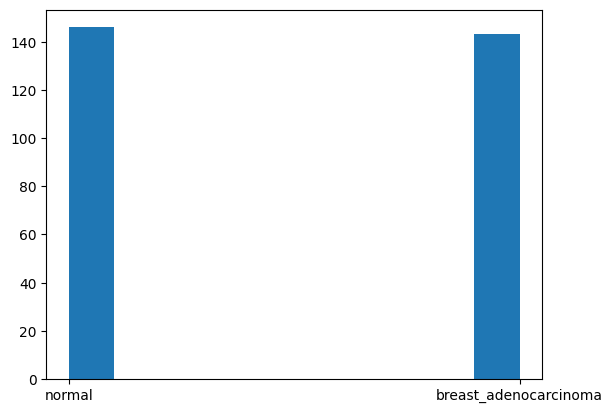

In [5]:
# visualizar a distribuição dos dados
plt.hist(database['type'], bins=10)

In [6]:
# separar os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(database.drop(['type','samples'], axis=1), database['type'], test_size=0.30, random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((202, 35981), (87, 35981), (202,), (87,))

In [8]:
y_train.value_counts(), y_test.value_counts()

(breast_adenocarcinoma    102
 normal                   100
 Name: type, dtype: int64,
 normal                   46
 breast_adenocarcinoma    41
 Name: type, dtype: int64)

# Aprendizagem de Máquina - Árvores de Decisão

In [9]:
# treinar o modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

1 NM_002263 0.010457125262912283
2 NM_080668 0.010340283780611817
3 NM_002421 0.009738571054861651
4 NM_006086 0.008909051567433292
5 NM_000493 0.00887050692419688
6 NM_013306 0.008483364128725905
7 NM_001797 0.007529995566593017
8 NM_007174 0.007109008894438279
9 NM_032012 0.006926344621373221
10 NM_005573 0.006743496113843625
11 NM_018492 0.006431883297014504
12 BC011243 0.006307994411087192
13 NM_006101 0.00618494750089656
14 NM_005327 0.006153694877160351
15 NM_203394 0.005966396758776859
16 NM_001002033 0.0059647058823529405
17 NM_006461 0.005892480989965265
18 NM_015148 0.005889969822422562
19 ENST00000366699 0.005830422356303589
20 NR_003491 0.005774545686835084
21 NM_021965 0.0057103811120975964
22 NM_001137675 0.005667719158031922
23 NM_015191 0.005667189952904237
24 NM_006845 0.005662745098039213
25 NM_002303 0.005634439622432932
26 NM_016448 0.005629843181176211
27 NM_001541 0.005554370441588487
28 NM_003318 0.005508981644758716
29 A_33_P3346331 0.005507322695407948
30 NM_14

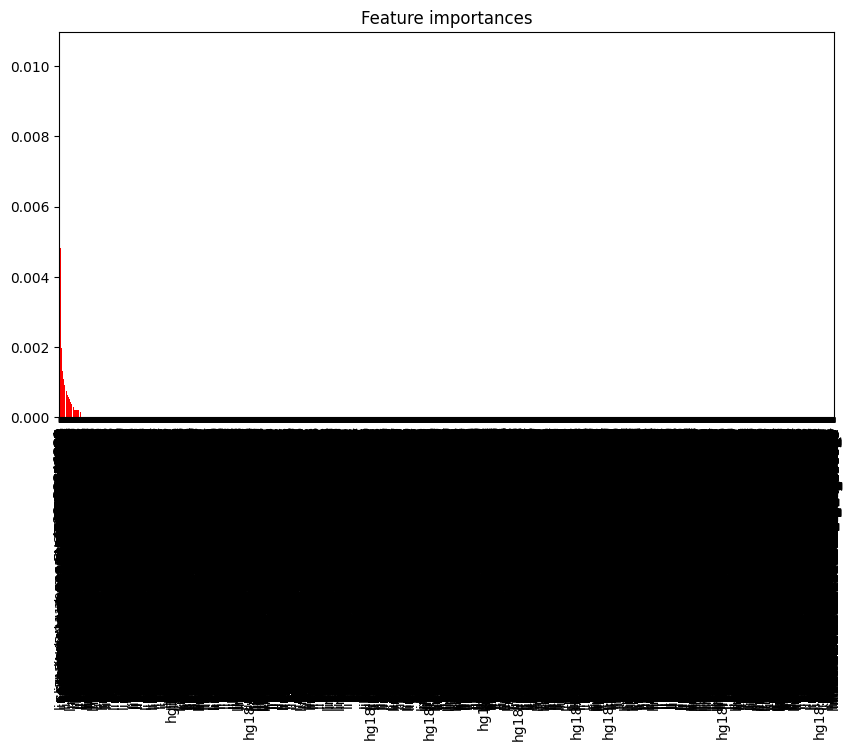

In [10]:
# encontrar quais são as features mais importantes e organizar em ordem decrescente
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

for i in range(X_train.shape[1]):
    print(f"{i+1} {feature_names[indices[i]]} {importances[indices[i]]}")


In [11]:
# prever os dados de teste
y_pred = rf.predict(X_test)

# avaliar o modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8735632183908046

<Axes: >

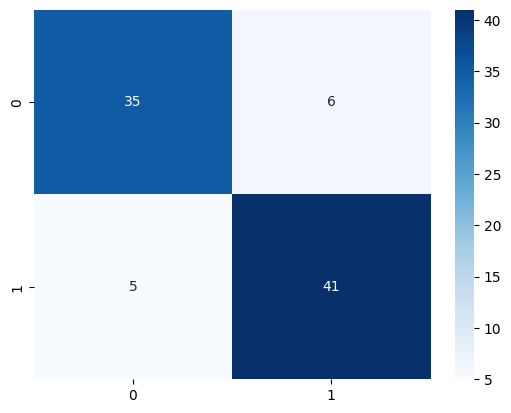

In [12]:
# visualizar a matriz de confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

<Axes: >

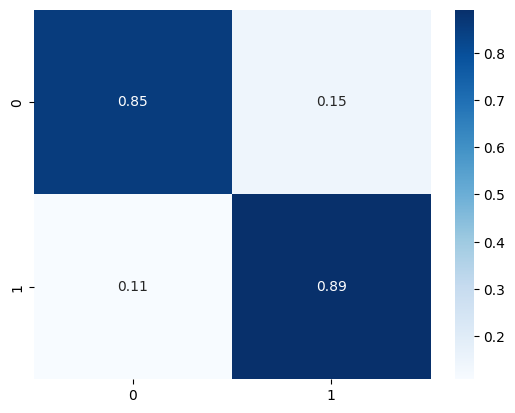

In [13]:
# visualizar a matriz de confusão normalizada
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.2f')

In [14]:
%pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/home/jonathan/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


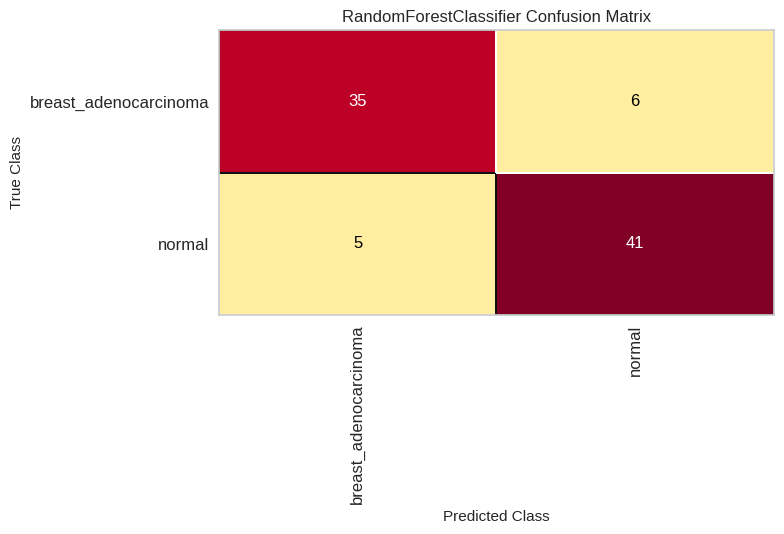

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [15]:
# matriz de confusao com yellowbrick
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()


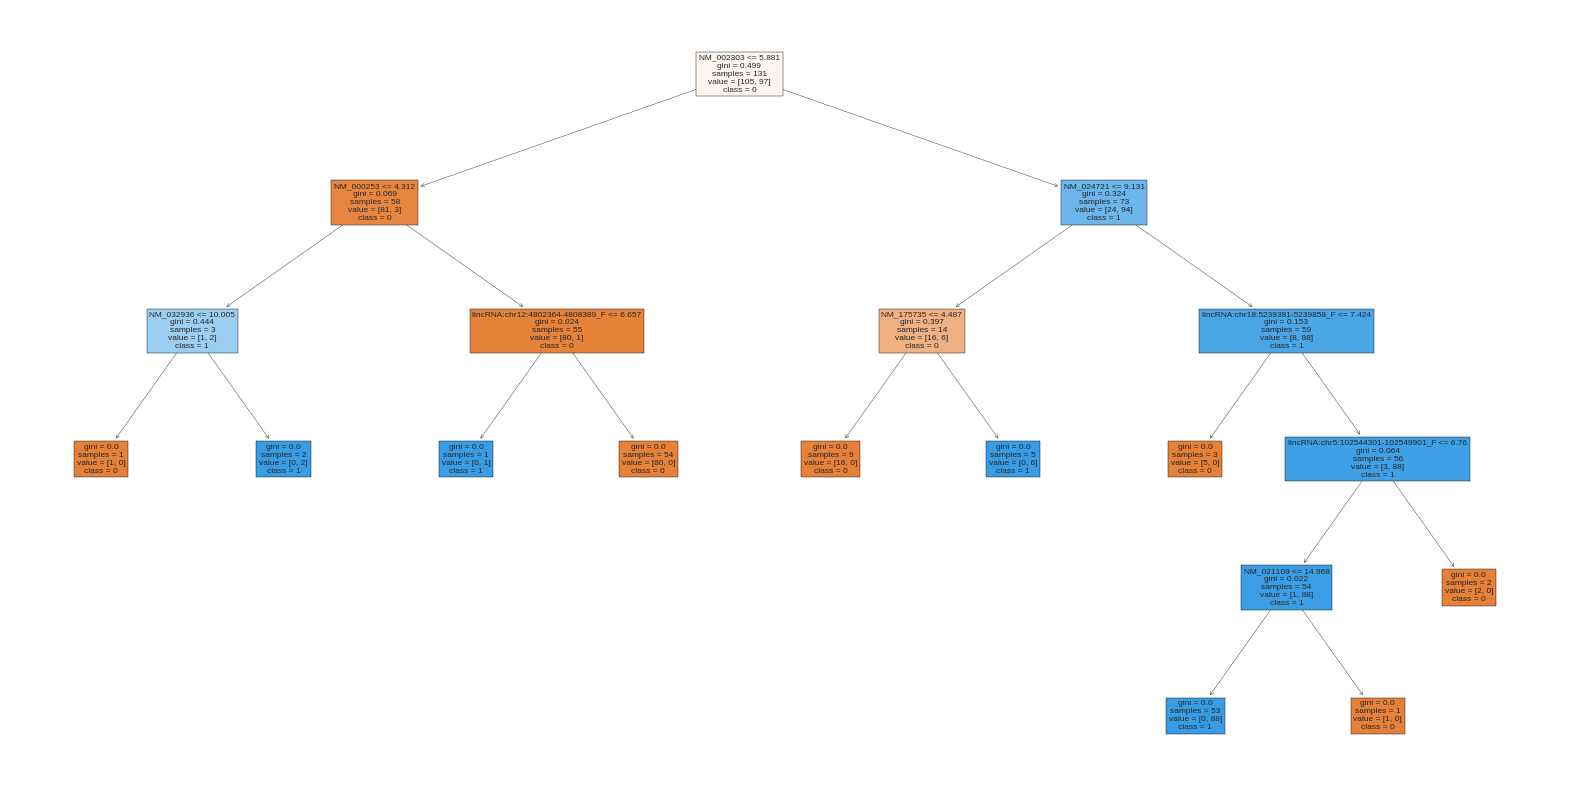

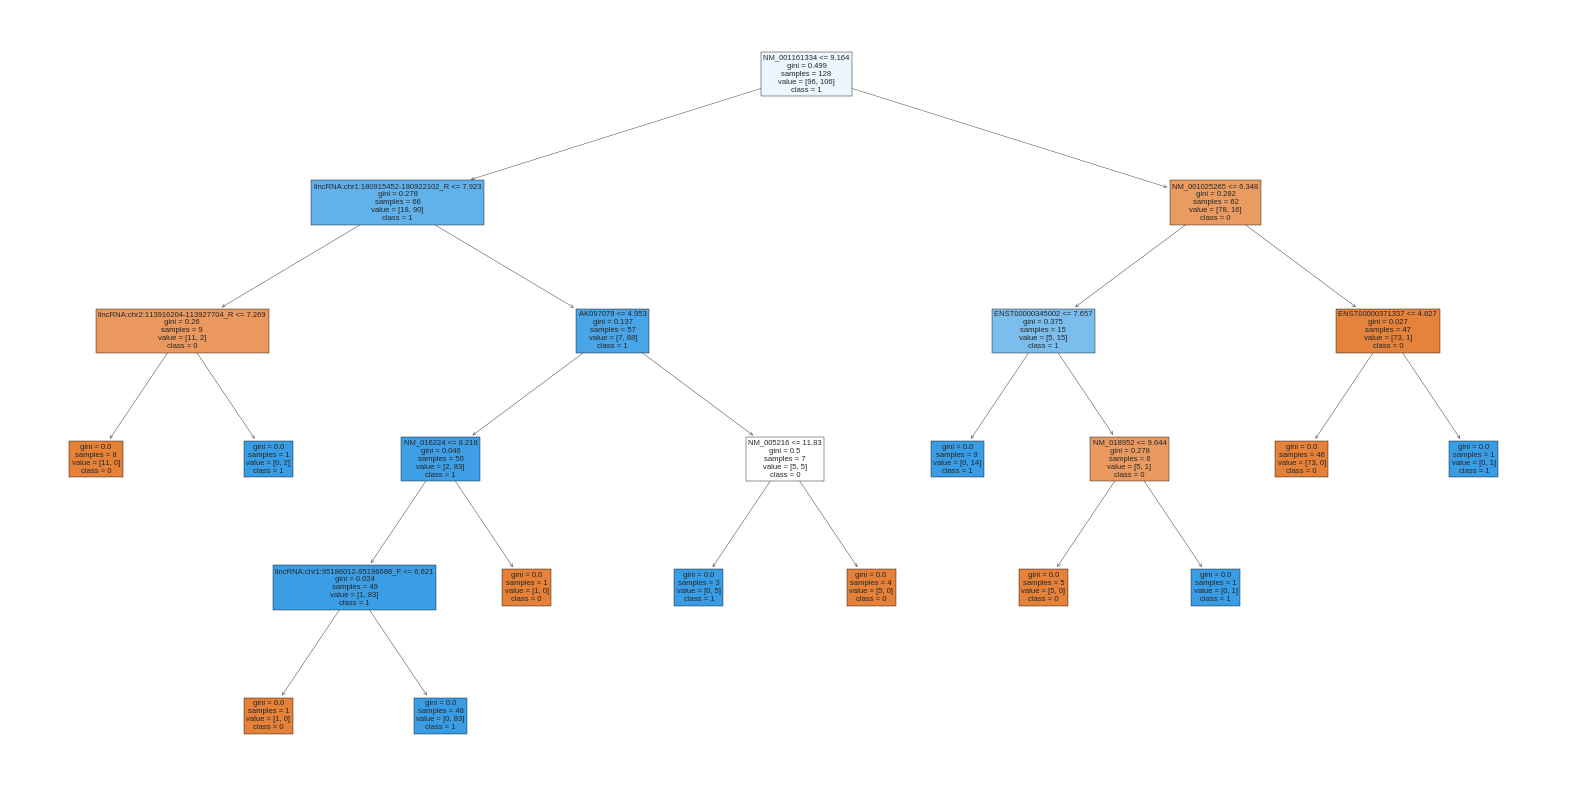

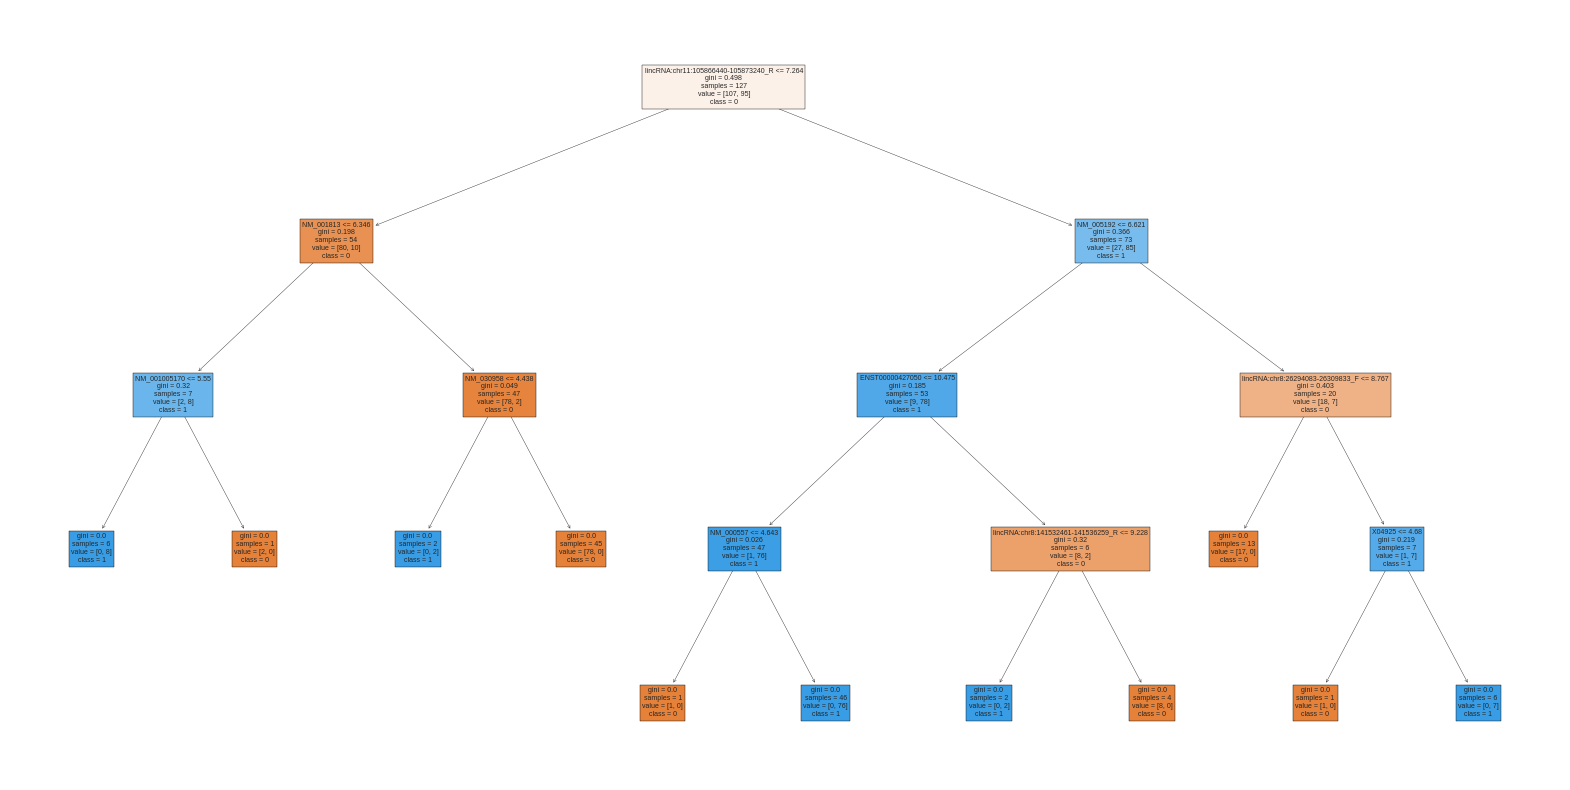

In [19]:
# plot the trees in the forest
from sklearn.tree import plot_tree
for i in range(3):
    plt.figure(figsize=(20,10))
    plot_tree(rf.estimators_[i], feature_names=feature_names, class_names=['0','1'], filled=True)
    plt.show()